# Problem Set 6 - Cost Functions
# Hudson Arney
## 10 April 2024
### CSC 5601 - Theory of Machine Learning
___

## Problem 1: Regularization

### 1. Regularization Hyperparameter:
   - **Difference between model’s parameter and hyperparameter:**
      - **Model Parameter:** Internal variables that the model adjusts the values of as they are learned from the training data. They are the coefficients or weights in the model equation.
      - **Hyperparameter:** External configuration settings used to tune the model's performance or complexity. They are set before the learning process begins and are not learned from the data.

   - **Effect of increasing λ on MSE:**
      - **Training MSE:** As λ increases, the regularization penalty becomes stronger, leading to smaller weights and higher bias. This can increase the training MSE.
      - **Test MSE:** Initially, test MSE might decrease as regularization helps to reduce overfitting. However, beyond a certain point, further increasing λ can lead to underfitting, causing test MSE to increase. This represents the bias-variance trade-off.

   - **Adjusting λ when training and validation errors are high and equal:**
      - If both training and validation errors are high and equal, it indicates that the model is underfitting. To address this, decrease the regularization hyperparameter λ to allow the model to learn more from the training data and reduce bias.

### Ridge Regression vs. Lasso Regression:
- **Ridge Regression:** Shrinks all weights towards zero but does not force them to be exactly zero.
- **Lasso Regression:** Can force some weights to be exactly zero, effectively performing feature selection.


___

### 2. Regularizing linear regression using the $L_{2}$ norm is known as the ridge regression.


In [10]:
#from sklearn.datasets import load_boston
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

In [11]:
data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [12]:
alpha = 0

pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('predictor', Ridge(alpha=alpha))
    ]
)


alphas = np.arange(0, 100, 0.1)
coefficients_norm = []

for alpha in alphas:
    pipe.set_params(predictor__alpha=alpha)
    pipe.fit(X_train, y_train)
    coefficients_norm.append(np.linalg.norm(pipe.named_steps['predictor'].coef_))
    #print(pipe.get_params())

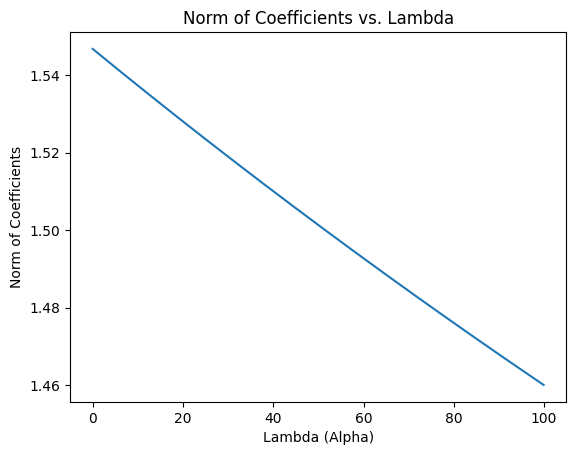

In [13]:
plt.plot(alphas, coefficients_norm)
plt.xlabel('Lambda (Alpha)')
plt.ylabel('Norm of Coefficients')
plt.title('Norm of Coefficients vs. Lambda')
plt.show()

____
## Problem 2: Class Weighted Algorithm

### Choosing $w_{1}$ with Respect to $w_{0}$:
If class 1 is the minority class, we should choose $w_{1}$ to be larger than $w_{0}$. This is because we want to draw the attention of the learning algorithm towards the minority class, thus assigning a higher weight to its loss in the cost function.


In [14]:
data = pd.read_csv('creditcard.csv')

class_proportions = data['Class'].value_counts(normalize=True)
print("Proportion of each class:")
print(class_proportions)

Proportion of each class:
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


In [15]:
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [17]:
weighted_logistic_model = LogisticRegression(class_weight='balanced')
weighted_logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced')

In [18]:
recall_logistic = recall_score(y_test, logistic_model.predict(X_test_scaled))
recall_weighted_logistic = recall_score(y_test, weighted_logistic_model.predict(X_test_scaled))

print("Recall score for Logistic Regression:", recall_logistic)
print("Recall score for Weighted Logistic Regression:", recall_weighted_logistic)

Recall score for Logistic Regression: 0.5816326530612245
Recall score for Weighted Logistic Regression: 0.9183673469387755
